In [1]:
# Load up diamonds data set
library(ggplot2)

# view rows and columns
dim(diamonds) 

[1] 53940    10

In [2]:
# make factors into bit fields

library(dplyr, warn.conflicts = FALSE)

# make more factors into bit fields

diamonds <- mutate(diamonds,
                   
    #cut             
    fair_cut = ifelse(cut == 'Fair', 1, 0),
    good_cut = ifelse(cut == 'Good', 1, 0),
    vgood_cut = ifelse(cut == 'Very Good', 1, 0),
    prem_cut = ifelse(cut == 'Premium', 1, 0),
    ideal_cut = ifelse(cut == 'Ideal', 1, 0),
                   
    # color                   
    D = ifelse(color == 'D', 1, 0),
    E = ifelse(color == 'E', 1, 0),
    F = ifelse(color == 'F', 1, 0),
    G = ifelse(color == 'G', 1, 0),
    H = ifelse(color == 'H', 1, 0),
    I = ifelse(color == 'I', 1, 0),
    J = ifelse(color == 'J', 1, 0),

    # clarity
    I1 = ifelse(clarity == 'I1', 1, 0),
    IF = ifelse(clarity == 'IF', 1, 0),
    SI1 = ifelse(clarity == 'SI1', 1, 0),
    SI2 = ifelse(clarity == 'SI2', 1, 0),
    VS1 = ifelse(clarity == 'VS1', 1, 0),
    VS2 = ifelse(clarity == 'VS2', 1, 0),
    VVS1 = ifelse(clarity == 'VVS1', 1, 0),
    VVS2 = ifelse(clarity == 'VVS2', 1, 0)
)

diamonds <- select(diamonds, -color, -cut, -clarity)

dim(diamonds)


[1] 53940    27

In [3]:
# use 80% of data to train, 20% to test

n <- nrow(diamonds)

# randomize order
diamonds <- diamonds[sample(n), ]

split <- floor(n * 0.80)
train <- diamonds[1:split,]
test <- diamonds[-(1:split),]

dim(train)
dim(test)

[1] 43152    27

[1] 10788    27

In [4]:
library(xgboost, warn.conflicts = FALSE)

# separate labels from features
y = train$price
X = data.matrix(select(train, -price))

# train
model = xgboost(data = X, 
                label = y,
                nthread = 4,
                max.depth = 25,
                alpha = 1.5,
                lambda = 1.5,
                nrounds = 200,
                eval_metric = "rmse",
                objective = "reg:linear",
                verbose = 0)


In [5]:
# predict
test$predicted <- round(xgboost::predict(model, data.matrix(test)), 0)

# show a sample
select(test, price, predicted) %>%
   sample_n(5)

,price,predicted
1,2386,1921
2,4414,6188
3,3629,2181
4,1786,3271
5,4440,4014


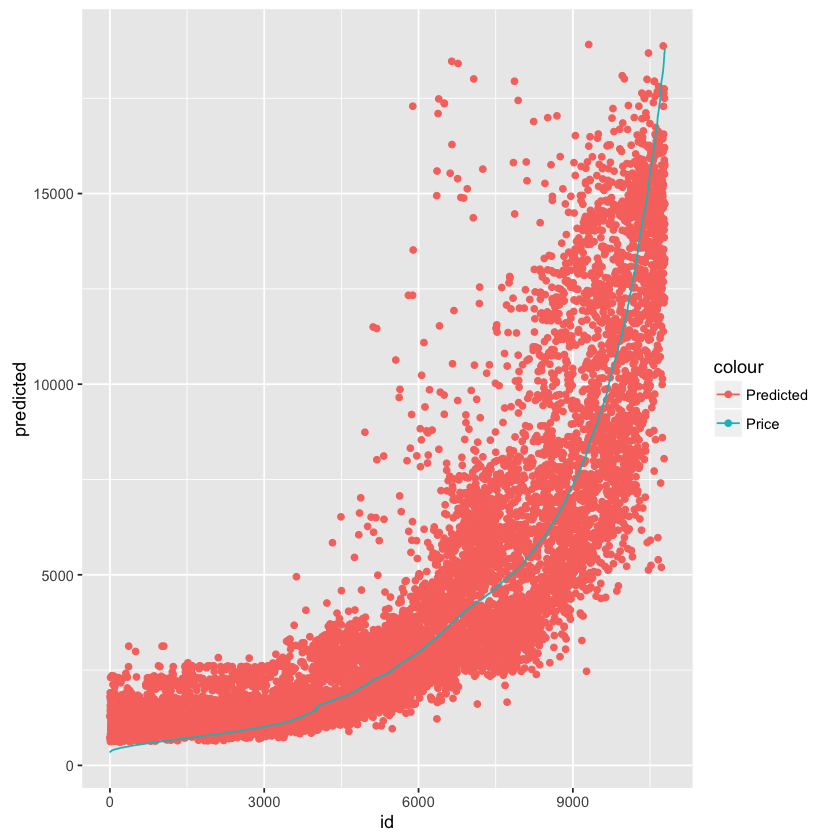

In [6]:
# print predicted(dots) against prices (sorted by price)

for_graph <- arrange(test, price) %>%
    select(price, predicted) %>%
    mutate(id = seq.int(nrow(test)))

options(jupyter.plot_mimetypes = 'image/png')
graph <- ggplot(data = for_graph, aes(x = id)) +
           geom_point(aes(y = predicted, color = "Predicted")) + 
           geom_line(aes(y = price, color = "Price"))
print(graph)
